<a href="https://colab.research.google.com/github/byambaa1982/bostonhouse_data_filter/blob/master/apartments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'coderjs-v1/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# Libraries and read CSV

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'coderjs-v1/'

In [0]:
import numpy as np
import pandas as pd
import regex as re
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir('/content/gdrive/My Drive/Boston Exported Data')  #change dir

In [0]:
df=pd.read_csv('itemsMerged.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
df=df[[df.columns[i] for i in range(38)]]

# Raw data size

In [0]:
print('total {} rows and {} columns'.format(df.shape[0], df.shape[1]))

total 398122 rows and 38 columns


# Property Types

In [0]:
prop_types=df['Property type'].unique().tolist()

In [0]:
def filter_it():
  for i in prop_types:
    df1=df[df['Property type']==i]
    print('total rows of {} is {}'.format(i, df1.shape[0]))
    # df1.to_csv(str(i)+'.csv')
  return df1

# Property Types by Numbers

In [0]:
my_series=df['Property type'].value_counts()
my_df=my_series.to_frame()

In [0]:
my_df

,Property type
Condo Main Building,96174
Three Family,55662
Two Family,53578
Apartment Building,46930
Residential/Commercial,38342
One Family,35757
Exempt,26062
Four to Six Family,15757
Commercial,13299
Exempt - 121A,5488


# Property Types By Plot

In [0]:
def barplot(x_data, y_data, x_label="", y_label="", title=""):
    _, ax = plt.subplots(figsize=(15, 8))
    # Draw bars, position them in the center of the tick mark on the x-axis
    ax.bar(x_data, y_data, color = '#539caf', align = 'center')
    # Draw error bars to show standard deviation, set ls to 'none'
    # to remove line between points
    ax.errorbar(x_data, y_data, color = '#297083', ls = 'none', lw = 2, capthick = 2)
    ax.set_ylabel(y_label, fontsize=16)
    ax.set_xlabel(x_label,fontsize=16)
    ax.set_title(title, fontsize=20, pad=30)
    plt.xticks(x_data, labels=x_data, rotation='vertical')

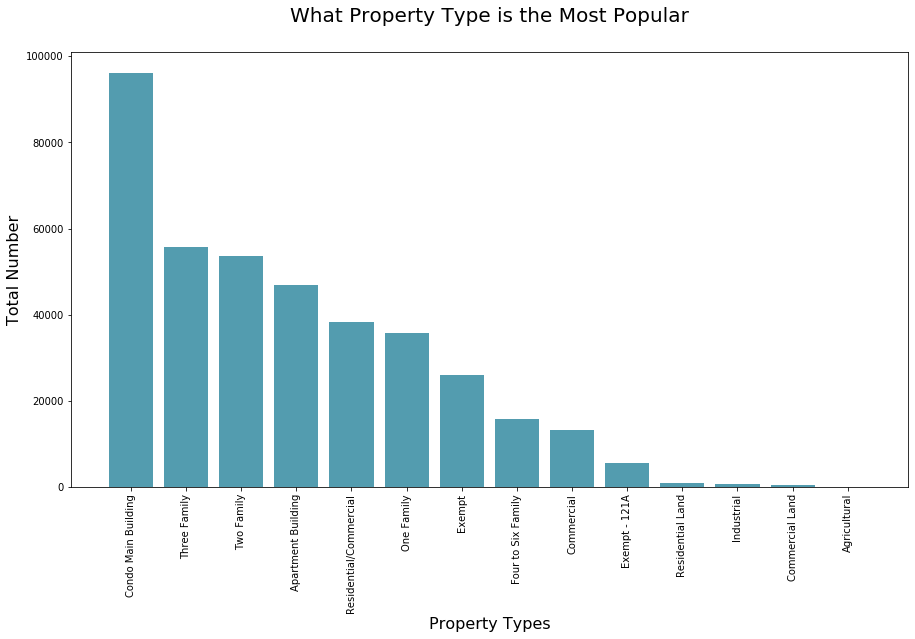

In [0]:

barplot( my_df.index, my_df['Property type'], x_label="Property Types", y_label="Total Number", title="What Property Type is the Most Popular" )

In [0]:
# for i in files:
#   # print(i)
#   df=pd.read_excel(i)
#   print('total shape of {} is {}'.format(i, df.shape))

# My REGEX Functions and Filters

In [0]:

#------ Pick only numbers---------
def only_number(mystr):
  try:
    new_str=(re.sub('[^0-9,]', "", mystr))
    return new_str
  except:
    np.nan

In [0]:
#------ Pick only the first one of array---------
def only_first(mystr):
  try:
    new_str=re.split(' ', mystr)
    return new_str[0]
  except:
    np.nan

In [0]:
def anystring_to_float(string):
  newstring ="" 
  my_float=""
  count=0
  try:
    for a in string: 
        if a=='.' or (a.isnumeric()) == True: 
            count+= 1
            my_float+=a
        else: 
            newstring+= a 
    # print(count) 
    # print(newstring) 
    # print('data type of {} is now {}'.format(num, type(num)))
    return float(my_float)
  except:
    return np.nan

In [69]:
only_first('233 dkfajd dkfd')

'233'

In [0]:
import regex as re
df['filter1']=df['Classification Code'].map(lambda row: only_number(row))
df['filter2']=df['Residential Exemption.1'].map(lambda row: only_number(row))
df['filter3']=df['Classification Code'].map(lambda row: only_first(row))

# This is our wanted Classification Code list

In [0]:
my_list=['0012','0013','0025','0026','0027','0031','0101','0102','0104','0105','0109','0111','0112','0113','0114','0115']

# Matching Classification Codes

In [0]:
all_list=df.filter3.unique().tolist()

In [0]:
my_list=['0012','0013','0025','0026','0027','0031','0101','0102','0104','0105','0109','0111','0112','0113','0114','0115']

In [84]:
count=0
for i in my_list:
  if i in all_list:
    print('{} is {}'.format(i, 'yes, it is in there.'))
    count+=1
  else:
    print('{} is {}'.format(i, 'no, it is not in there'))
print('Total {} of them is here'.format(count))

0012 is no, it is not in there
0013 is yes, it is in there.
0025 is no, it is not in there
0026 is no, it is not in there
0027 is no, it is not in there
0031 is yes, it is in there.
0101 is yes, it is in there.
0102 is no, it is not in there
0104 is yes, it is in there.
0105 is yes, it is in there.
0109 is yes, it is in there.
0111 is yes, it is in there.
0112 is yes, it is in there.
0113 is yes, it is in there.
0114 is yes, it is in there.
0115 is no, it is not in there
Total 10 of them is here


# The First Filter
Drop everything if Classification Code is different than our wanted ones

In [0]:
df1=df[df['filter3'].isin(my_list)]

In [105]:
print(' before filter {}'.format(df.shape[0]))
print(' after filter3 {}'.format(df1.shape[0]))
print(' Total {} row are dropped'.format(df.shape[0]-df1.shape[0]))

 before filter 398122
 after filter3 226031
 Total 172091 row are dropped


# The second Filter

Drop everything if classfication code is 0102 and value of Residential Exemption.1 is greater than 1.

In [111]:
df1['Residential Exemption.1 float']=df1['Residential Exemption.1'].map(lambda row: anystring_to_float(row))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
df2 = df1.drop(df1[(df1['filter3']=='0102') & (df1['Residential Exemption.1 float'] > 1)].index)

In [122]:
df2.shape

(226031, 42)

In [117]:
df2.shape

(137539, 42)

In [0]:
df2=df2[[df2.columns[i] for i in range(38)]]
df2.to_excel('total_rows_226031.xlsx')

# The last filter

If “Units in Building” is greater than 100, delete the row.

In [0]:
df3=df2.drop(df2[df2['Units in Building']>100].index)

In [126]:
df3.shape

(211899, 38)

In [0]:
df3.to_excel('total_rows_211899.xlsx')

# Before and After filter3 Classification value counts

In [131]:
df1['Classification Code'].value_counts()

0105 (Residential Property  / THREE-FAM DWELLING)      54931
0104 (Residential Property  / TWO-FAM DWELLING)        53578
0101 (Residential Property  / SINGLE FAM DWELLING)     35757
0013 (Multiple use Property / RES /COMMERCIAL USE)     34731
0112 (Apartment Property / APT 7-30 UNITS)             24992
0111 (Apartment Property / APT 4-6 UNITS)              15757
0031 (Multiple use Property / COMM MULTI-USE)           3611
0114 (Apartment Property / APT 100+ UNITS)              1235
0109 (Residential Property  / MULTIPLE BLDGS/1 LOT)      731
0113 (Apartment Property / APT 31-99 UNITS)              708
Name: Classification Code, dtype: int64

In [132]:
df2['Classification Code'].value_counts()

0105 (Residential Property  / THREE-FAM DWELLING)      54931
0104 (Residential Property  / TWO-FAM DWELLING)        53578
0101 (Residential Property  / SINGLE FAM DWELLING)     35757
0013 (Multiple use Property / RES /COMMERCIAL USE)     34731
0112 (Apartment Property / APT 7-30 UNITS)             24992
0111 (Apartment Property / APT 4-6 UNITS)              15757
0031 (Multiple use Property / COMM MULTI-USE)           3611
0114 (Apartment Property / APT 100+ UNITS)              1235
0109 (Residential Property  / MULTIPLE BLDGS/1 LOT)      731
0113 (Apartment Property / APT 31-99 UNITS)              708
Name: Classification Code, dtype: int64

In [130]:
df3['Classification Code'].value_counts()

0105 (Residential Property  / THREE-FAM DWELLING)      54931
0104 (Residential Property  / TWO-FAM DWELLING)        53578
0101 (Residential Property  / SINGLE FAM DWELLING)     35757
0013 (Multiple use Property / RES /COMMERCIAL USE)     23461
0112 (Apartment Property / APT 7-30 UNITS)             22874
0111 (Apartment Property / APT 4-6 UNITS)              15532
0031 (Multiple use Property / COMM MULTI-USE)           3447
0114 (Apartment Property / APT 100+ UNITS)               880
0109 (Residential Property  / MULTIPLE BLDGS/1 LOT)      731
0113 (Apartment Property / APT 31-99 UNITS)              708
Name: Classification Code, dtype: int64

# Check If there is any missing values

In [90]:
df1.isnull().sum()

Sam Address Id                                   0
Issued Registration                              0
Sam Address                                      0
Home-share Eligible                              0
Limited-share Eligible                           0
Owner-adjacent Eligible                          0
Owners Current License Types                     0
Income Restricted                                0
Problem Property                                 0
Problem Property Owner                           0
Open Violation Count                             0
Violations in the last 6 months                  0
Legally Restricted                               0
Unit Owner-occupied                              0
Building Owner-occupied                          0
Units in Building                                0
Building Single Owner                            0
Parcel Id                                        0
Address                                          0
Property type                  

In [0]:
df3.to_excel('fixed_one.xlsx')

# David House

In [0]:
david=df3[df3['Parcel Id']==0501637000.0]

In [129]:
david_list=[2,15,19,20,24,25]
david[[david.columns[i] for i in david_list]]

,Sam Address,Units in Building,Property type,Classification Code,"Owner on Tuesday, January 1, 2019",Owner's Mailing Address
265055,4 Myrtle St # 1,19,Two Family,0104 (Residential Property / TWO-FAM DWELLING),BACKMAN DAVID,4 MYRTLE ST BOSTON MA 02114
304589,4 Myrtle St,19,Two Family,0104 (Residential Property / TWO-FAM DWELLING),BACKMAN DAVID,4 MYRTLE ST BOSTON MA 02114
389060,4 Myrtle St # 2,19,Two Family,0104 (Residential Property / TWO-FAM DWELLING),BACKMAN DAVID,4 MYRTLE ST BOSTON MA 02114


# Some Value Counts

In [96]:
df['Building Owner-occupied'].value_counts()

N    397990
Y       132
Name: Building Owner-occupied, dtype: int64

In [99]:
df1['Unit Owner-occupied'].value_counts()

N    207104
Y     18927
Name: Unit Owner-occupied, dtype: int64

In [100]:
df1['Residential Exemption'].value_counts()

No     137539
Yes     88492
Name: Residential Exemption, dtype: int64

In [101]:
df1['Classification Code'].value_counts()

0105 (Residential Property  / THREE-FAM DWELLING)      54931
0104 (Residential Property  / TWO-FAM DWELLING)        53578
0101 (Residential Property  / SINGLE FAM DWELLING)     35757
0013 (Multiple use Property / RES /COMMERCIAL USE)     34731
0112 (Apartment Property / APT 7-30 UNITS)             24992
0111 (Apartment Property / APT 4-6 UNITS)              15757
0031 (Multiple use Property / COMM MULTI-USE)           3611
0114 (Apartment Property / APT 100+ UNITS)              1235
0109 (Residential Property  / MULTIPLE BLDGS/1 LOT)      731
0113 (Apartment Property / APT 31-99 UNITS)              708
Name: Classification Code, dtype: int64

In [102]:
df1['Property type'].value_counts()

Three Family              55662
Two Family                53578
Residential/Commercial    38342
One Family                35757
Apartment Building        26935
Four to Six Family        15757
Name: Property type, dtype: int64

In [104]:
df1['Residential Exemption'].value_counts()

No     137539
Yes     88492
Name: Residential Exemption, dtype: int64

In [124]:
df2['Units in Building'].value_counts()

3     55488
2     39714
1     32955
4     17883
5      8463
      ...  
63       64
62       63
59       60
57       58
49       50
Name: Units in Building, Length: 149, dtype: int64

In [98]:
david

,Sam Address Id,Issued Registration,Sam Address,Home-share Eligible,Limited-share Eligible,Owner-adjacent Eligible,Owners Current License Types,Income Restricted,Problem Property,Problem Property Owner,Open Violation Count,Violations in the last 6 months,Legally Restricted,Unit Owner-occupied,Building Owner-occupied,Units in Building,Building Single Owner,Parcel Id,Address,Property type,Classification Code,Lot Size,Gross Area,Year Built,"Owner on Tuesday, January 1, 2019",Owner's Mailing Address,Residential Exemption,Personal Exemption,FY2020 Building Value,FY2020 Land Value,FY2020 Total Assessed Value,FY2020 Tax Rates (per thousand) - Residential,FY2020 Tax Rates (per thousand) - Commercial,FY2020 Gross Tax,Community Preservation,Residential Exemption.1,Personal Exemption.1,FY2020 Net Tax,filter1,filter2,filter3
265055,280534,N,4 Myrtle St # 1,N,N,N,None,N,N,N,0,0,N,N,N,19,N,501637000.0,4 MYRTLE ST BOSTON MA 02114,Two Family,0104 (Residential Property / TWO-FAM DWELLING),636 sq ft,"1,977 sq ft",1855,BACKMAN DAVID,4 MYRTLE ST BOSTON MA 02114,Yes,No,"$1,266,400.00","$679,000.00","$1,945,400.00",$10.56,$24.92,"$20,543.43",$166.08,"$2,879.79",$0.00,"$17,829.72",0104,"2,87979",0104
304589,99738,N,4 Myrtle St,N,N,N,None,N,N,N,0,0,N,N,N,19,N,501637000.0,4 MYRTLE ST BOSTON MA 02114,Two Family,0104 (Residential Property / TWO-FAM DWELLING),636 sq ft,"1,977 sq ft",1855,BACKMAN DAVID,4 MYRTLE ST BOSTON MA 02114,Yes,No,"$1,266,400.00","$679,000.00","$1,945,400.00",$10.56,$24.92,"$20,543.43",$166.08,"$2,879.79",$0.00,"$17,829.72",0104,"2,87979",0104
389060,280535,N,4 Myrtle St # 2,N,N,N,None,N,N,N,0,0,N,N,N,19,N,501637000.0,4 MYRTLE ST BOSTON MA 02114,Two Family,0104 (Residential Property / TWO-FAM DWELLING),636 sq ft,"1,977 sq ft",1855,BACKMAN DAVID,4 MYRTLE ST BOSTON MA 02114,Yes,No,"$1,266,400.00","$679,000.00","$1,945,400.00",$10.56,$24.92,"$20,543.43",$166.08,"$2,879.79",$0.00,"$17,829.72",0104,"2,87979",0104
